In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from study_tracker import StudyTracker

logger = StudyTracker()   

#logger.start_session(subject="DIV", session="Evening")

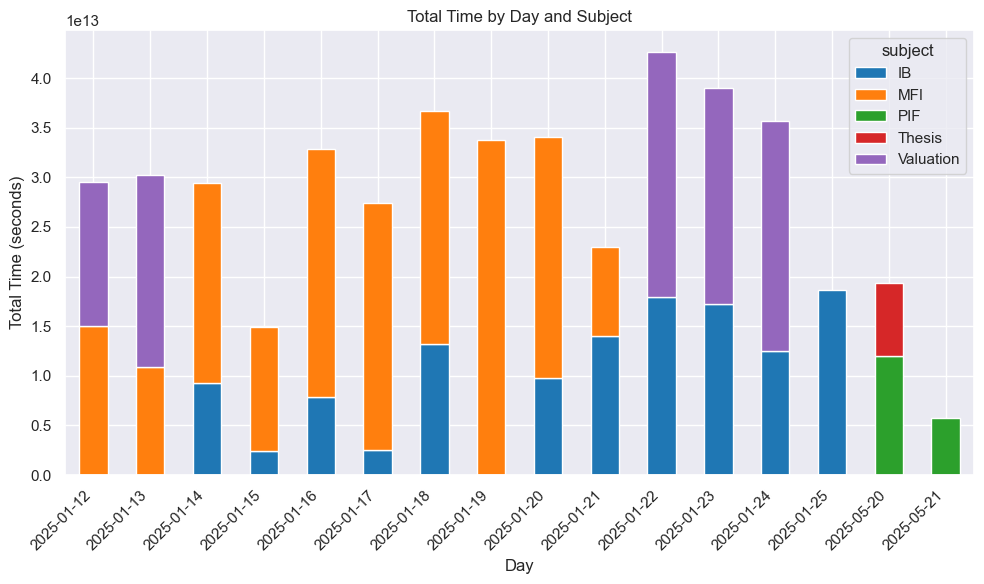

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from utils import *

# Setting plot context 
sns.set_context("notebook")  
sns.set_style("darkgrid")

df_ex = logger._open_log()

import matplotlib.pyplot as plt
import pandas as pd

# 0) If total_time is stored as strings, convert to numeric (seconds)
df_ex['total_time'] = pd.to_numeric(df_ex['total_time'], errors='coerce')

# 1) Pivot with pivot_table (this handles the fill for you)
df_pivot = df_ex.pivot_table(
    index='day',
    columns='subject',
    values='total_time',
    aggfunc='sum',
    fill_value=0
)

# 2) Plot as stacked bar
fig, ax = plt.subplots(figsize=(10, 6))
df_pivot.plot(kind='bar', stacked=True, ax=ax)

# 3) Clean up the axes
#formatter = FuncFormatter(seconds_to_hms)
#plt.gca().yaxis.set_major_formatter(formatter)

ax.set_xlabel('Day')
ax.set_ylabel('Total Time (seconds)')
ax.set_title('Total Time by Day and Subject')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
# Aggregate days
df_grouped = df_ex.groupby(["day"]).agg({"total_time": "sum"})

# Find time for each 
df_grouped['total_time_seconds'] = df_grouped['total_time'].dt.total_seconds()

# Create the plot
plt.figure(figsize=(14,10))
sns.barplot(data=df_grouped, x=df_grouped.index, y="total_time_seconds")

# Format the y-axis to show time in HH:MM:SS
formatter = FuncFormatter(seconds_to_hms)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Day')
plt.ylabel('Total Time (HH:MM:SS)')
plt.title('Total Time Spent Studying')
plt.show()


In [14]:
logger.abort_session() 

Studying for: 00:00:08	Time spent studying today: 00:00:08Study session of 23:27:32 aborted


In [12]:
logger.end_session()

Session already ended at: 23:23:13


In [24]:
df_today, time, pause = logger._today_stats()

max(df_today["end_time"]) - min(df_today["start_time"]) - time

Timedelta('0 days 00:16:22.150287')

In [7]:
time.microseconds / (time.microseconds + pause.microseconds)

0.4778933033852316

In [31]:
df_today

,day,start_time,end_time,total_time,session,subject
103,2025-05-19,2025-05-19 22:52:21.116748,2025-05-19 22:52:24.840193,0 days 00:00:03.723445,Evening,DIV
104,2025-05-19,2025-05-19 22:52:30.402256,2025-05-19 22:52:33.193277,0 days 00:00:02.791021,Evening,DIV
105,2025-05-19,2025-05-19 23:08:49.781501,2025-05-19 23:08:54.658786,0 days 00:00:04.877285,Evening,DIV


In [26]:
df_today.iloc[-1,1] - df_today.iloc[-2,2]

Timedelta('0 days 00:16:16.588224')

In [17]:
df_today

,day,start_time,end_time,total_time,session,subject
103,2025-05-19,2025-05-19 22:52:21.116748,2025-05-19 22:52:24.840193,0 days 00:00:03.723445,Evening,DIV
104,2025-05-19,2025-05-19 22:52:30.402256,2025-05-19 22:52:33.193277,0 days 00:00:02.791021,Evening,DIV


In [ ]:
df = logger._open_log()

import pandas as pd

# Assuming your DataFrame is named 'df'

# Group by subject and sum the total_time
total_time_by_subject = df.groupby('subject')['total_time'].sum()

# Optionally, format the total time as HH:MM:SS
total_time_by_subject = total_time_by_subject.apply(
    lambda x: f"{int(x.total_seconds() // 3600):02}:{int((x.total_seconds() % 3600) // 60):02}:{int(x.total_seconds() % 60):02}"
)

total_time_by_subject


subject
IB           34:49:45
MFI          55:16:16
Valuation    28:43:56
Name: total_time, dtype: object

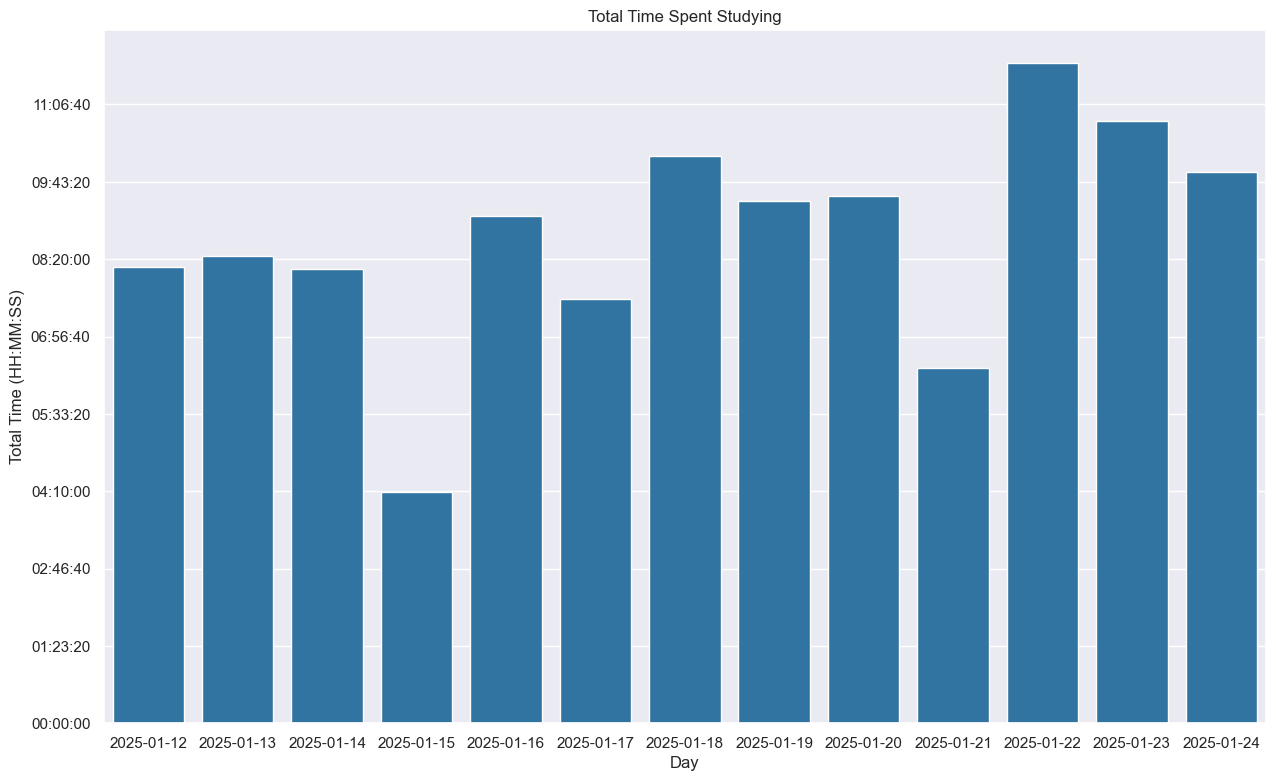

In [12]:
logger.plot_days_total()

In [2]:
a = """
⣿⣟⢾⣲⢭⣷⢩⣶⡭⣲⡜⠤⢎⡸⢄⡐⠨⡍⡋⠇⡀⠀⠳⠄⡈⠔⡁⢢⠈⡔⠊⠔⣦⠠⢤⢀⠥⠂⠀⠄⠀⠊⠅⠒⣀⣁⠐⣀⠆⣀⠢⢄⣶⣬⣴⣾⣵⣿⢊⣽⣤⣓⣦⣶⣡⣷⣂⣠⢤⣱⣶⣖⢀⡀⠄⠡⢐⢂⠰⣈⠰⠠⠤⠠⠔⠂⡘⢤⡂⢜⠠⢂⠡⢌⠘⢬⠉⠎⡑⢢⠁⣇⡾⢟⢿⣧⠣⢟⠞⣿⡏⣼⣹⡰⢫⡵⣫⠜
⣿⣞⡧⣖⣩⢻⣧⠛⢷⠟⣣⢱⡋⢶⡋⠖⡳⡐⡷⣤⢅⣈⢹⡈⢣⠘⡰⠠⡁⣀⠆⡡⠏⢒⠘⢈⡤⡐⢂⢸⠁⢌⡁⢣⣐⣶⣶⣾⣾⣷⣿⣿⣿⣿⣿⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣦⣾⣮⣶⣦⣭⡔⢦⣌⡓⢦⡇⣩⡄⢍⡳⠟⣶⣎⣄⢎⣀⣂⠄⣃⢰⢎⠐⡶⡞⠻⡏⠓⣆⠹⢌⡺⣣⢟⣧⣿⣏⢲⣑⢳⠚
⡿⣎⡷⣳⢬⢇⢿⣿⣮⡵⢖⣿⣶⠊⡝⣾⢆⡟⠇⣯⡾⠃⠬⢃⢦⠃⢆⡑⢠⠚⠰⠥⢌⣢⢘⣞⡆⣷⢬⣿⣿⣬⣷⣷⣿⣿⣿⡿⣿⣿⠿⠿⣿⣿⡛⠹⠻⠽⢟⡡⢋⠧⠚⠩⠍⠛⠫⡍⢛⣿⣿⣿⢿⣿⣿⣿⣿⣿⣿⣷⣾⣿⣿⣶⣭⣋⣻⢶⠏⡙⣔⠾⣾⡳⢭⣶⠤⠾⢺⡌⢁⠒⠡⣍⢀⠱⣈⠂⣵⡷⣸⡿⢾⡳⢯⡜⣣⢏
⣿⡱⢯⡵⣋⡎⡖⣸⢿⣵⠞⠃⣷⢱⢸⣡⠨⣈⡽⢓⣶⡹⠟⣬⣄⣻⡎⠔⣂⠌⢠⣾⣻⣫⣼⣿⣷⣿⣿⣿⣿⣿⠿⣟⣋⠏⠵⠿⢿⣼⣍⡁⢊⠻⢿⡷⡍⢈⠢⠒⢠⠐⢂⠀⡄⠁⠐⠘⢦⢸⣿⣴⠀⣿⡿⠀⠻⠿⠿⠿⣿⣿⣿⣿⣿⣿⣿⣿⣬⣷⣌⡿⢧⣿⢏⠼⣳⡌⠙⡀⠁⡤⢀⠇⢊⠰⣠⣼⢡⢃⠿⣟⡷⡿⣬⡓⣜⡺
⡷⢻⣓⢮⣑⡾⢼⡞⢩⡄⡏⢼⣛⣯⡞⣇⠞⣡⢓⡀⢠⠙⣀⡍⢡⢚⠧⣌⣄⣶⣿⣶⣷⣿⣿⣿⡿⢿⣿⠛⢾⣡⣍⠦⡑⢊⡐⢦⣘⢹⣽⣞⡭⡒⢌⠻⣷⣤⡤⣉⠒⡄⠂⡈⢐⣀⡆⣁⣦⣿⣿⡆⠀⣿⢻⡀⠀⠀⠠⢴⣿⣿⠿⠿⣿⣿⣿⣾⣿⣿⣿⣯⠻⡵⢮⣘⣡⢿⣧⡤⣇⡲⠨⠈⣁⡒⡸⣏⠸⡶⣌⣹⡿⡱⣥⣛⢬⡱
⣏⡳⣹⣾⣿⡗⣩⢸⣿⢡⡂⢏⡽⣿⣧⠫⢌⡱⠬⣅⢃⢚⡜⣧⣥⣬⣶⣯⣿⣿⣿⣿⡿⣿⢏⡻⡑⠂⢿⡼⡐⣿⣿⣿⡳⠶⣮⢴⣿⣜⡛⣿⣷⣿⣾⣷⡹⣿⣯⣤⡓⡴⣁⢲⣳⣟⣦⣿⣹⣿⣿⣷⠠⣹⣿⠉⠀⠀⠉⣻⣿⣿⡍⢢⠘⠿⢿⣿⣿⣿⣿⣿⣿⣽⣫⣽⣛⡷⢿⣔⠟⢃⡪⣁⠐⡤⡁⢸⣐⠏⣼⡫⣴⡿⢶⣙⢮⠱
⢯⣓⢏⣼⣟⣘⣼⣸⡿⡽⣧⣟⠰⡘⡫⡼⠦⡙⢎⠤⣩⠎⣽⣲⣿⣼⣿⣿⡿⠿⣿⣜⣳⣽⡬⠇⢩⣷⡽⣿⣿⣜⣿⣿⣿⣷⣿⣿⣿⣿⡱⢎⣿⣿⣿⣿⣿⣾⣿⣿⣿⣿⣿⣿⣿⣾⣿⣿⣿⣿⣿⣷⣾⣿⣿⣇⣀⣀⣶⣿⣿⡟⠀⠀⠂⣥⣞⣻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣳⣿⣮⡸⠜⢣⣿⡧⢱⡌⢸⠋⢜⣯⢣⣿⢭⣷⢺⣭⢓
⢧⡹⣎⠸⢿⣋⣶⠟⣩⠑⣿⣎⢽⠥⡩⡕⢢⡙⢎⡱⣌⣺⢭⢳⣮⡿⣧⠻⡱⢩⠼⢩⢽⣿⣿⣦⡝⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣥⣄⢤⢠⣿⣿⡷⣹⣻⣿⣿⣿⣿⣿⣿⣿⣷⣿⣷⣻⣿⣛⣷⢖⣂⠽⣾⢽⡟⣋⠟⠯⠷⣾⣧⢫⢏
⢧⠳⡅⢣⣘⣧⣾⣻⠑⣎⡼⡿⢈⠋⣕⠊⡤⠳⣈⢳⣙⣬⣛⡯⢩⡽⢣⣯⣝⡣⡘⣸⣬⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⢷⣻⢿⢡⡛⣿⣿⣿⣿⣿⣿⣿⣿⣧⣿⣯⠭⠯⡗⠶⠏⡖⡩⢜⣴⡿⢭⡔⣻⢎
⣎⢧⡙⣄⢲⡜⡵⢻⣶⡋⡴⢷⣦⡗⢭⣒⢡⣟⣧⡗⡯⣳⢟⡌⣳⠩⢷⣿⣿⣵⣽⣿⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣜⣏⠶⣱⢮⣿⣿⣿⣿⣿⣿⣿⣿⣷⣝⣇⢧⡵⢸⢱⡳⣓⣉⡛⣷⣟⢾⡱⢯
⢜⢢⡑⢌⢲⠖⢌⣸⣏⠗⡷⣾⢻⡾⢷⣮⣥⣾⣿⣯⢵⣟⣮⣜⣿⣽⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⢻⣝⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣯⣿⣎⣷⣿⣿⣿⣿⣿⣿⣿⣟⣾⢿⣳⣿⣏⠲⢧⡉⡛⢱⡟⣌⠞⣭⢳
⢎⠤⡑⣨⢛⡜⣦⣶⠾⣹⣾⣿⡿⢯⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠿⠛⡉⣍⠛⡃⠎⡄⣗⡎⢿⣿⣿⣿⠟⠉⣹⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠋⠙⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣯⢝⡫⢿⣿⣿⣻⣿⣿⣿⢷⣺⣯⣹⡃⡾⢏⠹⡌⡏⡴⢫
⡜⠬⣑⢣⣮⢖⣼⢾⣿⣿⣿⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⢛⣋⠡⢈⡤⠥⠛⠛⠉⠫⡀⠀⢹⣞⣿⣿⣿⣤⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡂⠴⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠿⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣟⣻⡵⣋⣿⣿⣿⣿⣿⣿⣽⢷⣥⣳⢸⠋⠖⡄⠳⣌⠳
⠰⠌⠰⡦⢽⣿⢼⣿⣯⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⣯⡿⠕⠃⠄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠚⣿⣿⣿⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣤⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⡤⠧⢩⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣾⣭⣷⢻⣟⣾⣿⣿⣻⡾⣇⢿⠆⢰⡜⠸⡱⢌⠣
⢈⠒⡅⡒⠿⡭⢻⠜⣳⣽⢻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣽⡚⡔⢣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡹⢿⣿⣿⣿⣿⣿⣍⢈⣣⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠇⠀⠀⠀⠸⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣟⣯⢖⡹⣿⠿⣽⠆⣈⠤⡁⠓⡁⢜⡒
⠠⠉⠤⠑⢰⢹⣣⢿⣼⣿⣿⡻⣿⣿⣻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣏⣶⢤⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠤⠝⣿⣿⣿⣿⣝⡾⣧⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠧⠀⠀⠀⠀⠄⠽⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣌⠶⡏⢾⣫⡷⣼⢐⡃⠤⠑⠈⢀
⢀⠱⠂⢑⡲⣼⣶⢟⡸⢓⡎⡵⠫⡜⡵⢻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣯⣿⣏⣽⣦⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⣹⣿⣿⣿⣾⣽⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡟⠁⠀⠀⠀⠀⠈⢾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣥⢪⡟⡀⠁⠈⠀⠘⠀⠀⠈
⠀⠄⠣⢌⠱⣊⠝⡪⠵⠉⠞⡤⡑⢚⠞⡛⠞⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣿⣾⣾⣑⡶⣀⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠏⠀⠀⢀⣀⠀⣀⡀⠰⣿⡿⠿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣇⣺⣭⡏⠔⠀⠀⠀⠀⠀⠀
⠈⠈⠡⢌⣵⣤⠚⢠⠈⡉⠐⠒⢯⠲⣌⡐⠡⠟⡗⢼⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣭⣷⣬⢦⣀⣀⡀⣀⠀⠀⠀⠀⣏⠻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠟⠃⠀⠀⢀⣘⣦⡠⡄⠤⣿⣼⠇⣴⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣯⢿⡄⠓⠐⠂⠀⠀⠀⠀⠀
⠀⠀⢃⠀⢀⠈⠅⡙⣄⡅⠌⠐⡀⡆⠈⢸⢃⣭⣹⠾⢾⣯⣿⡿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣿⣫⢵⣸⣦⣼⣰⣙⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠿⣇⢶⣴⣬⣿⣿⣿⣿⣷⣯⣷⣿⣧⣼⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣻⢿⡧⡄⠀⠀⠀⠀⠀⠀⠀
⠀⠀⡀⠀⠆⡠⠐⠀⠃⠃⠈⠀⣀⠁⡐⠳⣌⠸⠀⠌⣄⠫⡝⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣟⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣯⣿⣿⣿⣿⣿⣿⣿⡿⣿⢿⠿⣿⣿⡿⣿⣿⠿⣿⣿⣿⣿⣿⣻⣟⡻⠼⢃⣿⡏⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠁⠀⠈⠉⠉⠁⢉⣥⣮⠥⡼⢋⡁⢆⣉⠻⣿⣻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⢯⣛⡿⠛⢿⠿⠛⣍⡷⠏⠙⠛⠛⢻⠻⣭⣙⣇⡳⢿⢠⠛⠴⢿⣿⣿⣷⠡⠆⡙⢈⣡⠌⠁⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠐⠀⠀⠂⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠟⠠⡀⠁⠀⠀⠠⢈⠰⢉⡛⢿⣝⡿⣻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣾⣷⣎⡐⢢⣆⣳⡩⢌⣶⡏⠀⢠⡌⢳⡑⠪⡅⢠⡑⡈⠧⢾⠻⢾⡭⢐⣀⡡⠈⠁⠈⠀⠈⢂⠔⡀⠀⣀⠀⠀⡀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠸⠆⠀⢻⣿⣷⡙⠿⡛⣿⣹⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡹⣯⢿⣼⡿⢽⠳⣿⢸⣏⢻⣆⣼⠣⣅⠍⢳⣚⢣⡜⢡⠂⠌⣲⡶⢀⡥⠐⠀⠀⠐⠤⠁⠒⣤⠶⢁⡀⡂⠦⠁⢆
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢬⣹⠟⠋⠛⣤⣹⡽⣟⢿⡛⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣟⣯⣿⣿⣿⣿⣯⠿⣞⣳⣇⢻⣷⡉⡿⡍⣿⣸⡟⡁⠚⢥⡂⠭⠙⣩⠏⣴⣠⡅⣎⠛⡃⢈⠻⣪⠥⢷⡾⢎⣼⣋⠴⣉⠐⠄⠂
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠁⠀⠀⠀⠴⠛⣙⣿⣶⡭⢊⠿⣍⠻⡽⣳⣾⡷⢿⣿⣿⣿⡿⣿⣿⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠿⣭⢻⣟⢿⣻⢋⡿⣿⣷⠿⢒⣰⡭⢹⠌⣿⠳⡔⣻⡿⠛⠅⡐⠬⢀⠹⡄⠱⠿⢮⢍⣣⡞⣧⡙⡴⢉⣦⢟⢎⢻⣜⣮⣙⠠⠒⡌⠰⠈⠦
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⢯⣳⠄⠀⢈⠹⢿⡁⣌⣻⡙⢿⣿⠷⣏⡙⢢⣽⠢⢛⣭⣹⠟⣛⠛⣿⣷⣎⣟⣋⠻⣏⣿⣋⢴⣷⠶⠉⢡⡷⠖⠂⠚⢉⠙⠏⡁⠆⡥⢘⠉⡠⠔⠠⢂⠶⢯⣌⣐⣶⣎⢱⡶⣶⠳⢽⡟⣧⣾⢌⣲⣿⣏⢳⣰⠋⡜⡍⢓⠶
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠐⠀⠀⠆⠈⠙⠏⠀⠸⠚⠉⠋⠥⠶⠥⠻⠯⣄⠂⠑⠸⢦⠭⠤⠬⠥⠎⠻⠿⠰⠙⠉⠠⠀⠀⠀⠀⠀⠀⠤⠀⠉⠃⡐⠠⢂⠸⡀⣃⣌⢽⡼⡟⡛⢽⢻⡟⣠⡿⣙⡿⣿⣿⠳⢩⣼⣏⠷⡿⣏⡵⠰⡈⣅⢢
"""
print(a)


⣿⣟⢾⣲⢭⣷⢩⣶⡭⣲⡜⠤⢎⡸⢄⡐⠨⡍⡋⠇⡀⠀⠳⠄⡈⠔⡁⢢⠈⡔⠊⠔⣦⠠⢤⢀⠥⠂⠀⠄⠀⠊⠅⠒⣀⣁⠐⣀⠆⣀⠢⢄⣶⣬⣴⣾⣵⣿⢊⣽⣤⣓⣦⣶⣡⣷⣂⣠⢤⣱⣶⣖⢀⡀⠄⠡⢐⢂⠰⣈⠰⠠⠤⠠⠔⠂⡘⢤⡂⢜⠠⢂⠡⢌⠘⢬⠉⠎⡑⢢⠁⣇⡾⢟⢿⣧⠣⢟⠞⣿⡏⣼⣹⡰⢫⡵⣫⠜
⣿⣞⡧⣖⣩⢻⣧⠛⢷⠟⣣⢱⡋⢶⡋⠖⡳⡐⡷⣤⢅⣈⢹⡈⢣⠘⡰⠠⡁⣀⠆⡡⠏⢒⠘⢈⡤⡐⢂⢸⠁⢌⡁⢣⣐⣶⣶⣾⣾⣷⣿⣿⣿⣿⣿⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣦⣾⣮⣶⣦⣭⡔⢦⣌⡓⢦⡇⣩⡄⢍⡳⠟⣶⣎⣄⢎⣀⣂⠄⣃⢰⢎⠐⡶⡞⠻⡏⠓⣆⠹⢌⡺⣣⢟⣧⣿⣏⢲⣑⢳⠚
⡿⣎⡷⣳⢬⢇⢿⣿⣮⡵⢖⣿⣶⠊⡝⣾⢆⡟⠇⣯⡾⠃⠬⢃⢦⠃⢆⡑⢠⠚⠰⠥⢌⣢⢘⣞⡆⣷⢬⣿⣿⣬⣷⣷⣿⣿⣿⡿⣿⣿⠿⠿⣿⣿⡛⠹⠻⠽⢟⡡⢋⠧⠚⠩⠍⠛⠫⡍⢛⣿⣿⣿⢿⣿⣿⣿⣿⣿⣿⣷⣾⣿⣿⣶⣭⣋⣻⢶⠏⡙⣔⠾⣾⡳⢭⣶⠤⠾⢺⡌⢁⠒⠡⣍⢀⠱⣈⠂⣵⡷⣸⡿⢾⡳⢯⡜⣣⢏
⣿⡱⢯⡵⣋⡎⡖⣸⢿⣵⠞⠃⣷⢱⢸⣡⠨⣈⡽⢓⣶⡹⠟⣬⣄⣻⡎⠔⣂⠌⢠⣾⣻⣫⣼⣿⣷⣿⣿⣿⣿⣿⠿⣟⣋⠏⠵⠿⢿⣼⣍⡁⢊⠻⢿⡷⡍⢈⠢⠒⢠⠐⢂⠀⡄⠁⠐⠘⢦⢸⣿⣴⠀⣿⡿⠀⠻⠿⠿⠿⣿⣿⣿⣿⣿⣿⣿⣿⣬⣷⣌⡿⢧⣿⢏⠼⣳⡌⠙⡀⠁⡤⢀⠇⢊⠰⣠⣼⢡⢃⠿⣟⡷⡿⣬⡓⣜⡺
⡷⢻⣓⢮⣑⡾⢼⡞⢩⡄⡏⢼⣛⣯⡞⣇⠞⣡⢓⡀⢠⠙⣀⡍⢡⢚⠧⣌⣄⣶⣿⣶⣷⣿⣿⣿⡿⢿⣿⠛⢾⣡⣍⠦⡑⢊⡐⢦⣘⢹⣽⣞⡭⡒⢌⠻⣷⣤⡤⣉⠒⡄⠂⡈⢐⣀⡆⣁⣦⣿⣿⡆⠀⣿⢻⡀⠀⠀⠠⢴⣿⣿⠿⠿⣿⣿⣿⣾⣿⣿⣿⣯⠻⡵⢮⣘⣡⢿⣧⡤⣇⡲⠨⠈⣁⡒⡸⣏⠸⡶⣌⣹⡿⡱⣥⣛⢬⡱
⣏⡳⣹⣾⣿⡗⣩⢸⣿⢡⡂⢏⡽⣿⣧⠫⢌⡱⠬⣅⢃⢚⡜⣧⣥⣬⣶⣯⣿⣿⣿⣿⡿⣿⢏⡻⡑⠂⢿⡼⡐⣿⣿⣿⡳⠶⣮⢴⣿⣜⡛⣿⣷⣿⣾⣷⡹⣿⣯⣤⡓⡴⣁⢲⣳⣟⣦⣿⣹⣿⣿⣷⠠⣹⣿⠉⠀⠀⠉⣻⣿⣿⡍⢢⠘⠿⢿⣿⣿⣿⣿⣿⣿⣽⣫⣽⣛⡷⢿⣔⠟⢃⡪⣁⠐⡤⡁⢸⣐⠏⣼⡫⣴⡿⢶⣙⢮⠱
⢯⣓⢏⣼⣟⣘⣼⣸⡿⡽⣧⣟⠰⡘⡫⡼⠦⡙⢎⠤⣩⠎⣽⣲⣿⣼⣿⣿⡿⠿⣿⣜⣳⣽⡬⠇⢩⣷⡽⣿⣿⣜⣿⣿⣿⣷⣿⣿⣿⣿⡱⢎⣿⣿⣿⣿⣿⣾⣿⣿⣿⣿⣿⣿⣿⣾⣿⣿⣿⣿⣿⣷⣾⣿⣿⣇⣀⣀⣶⣿⣿⡟⠀⠀⠂⣥⣞⣻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣳⣿⣮⡸⠜⢣⣿⡧⢱⡌⢸⠋⢜⣯⢣⣿⢭⣷⢺⣭⢓
⢧⡹⣎⠸⢿⣋⣶⠟⣩⠑⣿⣎⢽⠥⡩⡕⢢⡙⢎⡱⣌⣺⢭⢳⣮⡿⣧⠻⡱⢩⠼⢩⢽⣿⣿⣦⡝⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣥⣄⢤⢠⣿⣿⡷⣹⣻⣿⣿⣿⣿⣿⣿⣿⣷⣿⣷⣻⣿⣛⣷⢖⣂⠽⣾⢽⡟⣋⠟⠯⠷⣾⣧⢫⢏
⢧⠳⡅⢣⣘⣧⣾⣻⠑⣎⡼⡿⢈⠋⣕⠊⡤⠳⣈⢳⣙⣬⣛⡯⢩⡽⢣⣯⣝⡣⡘⣸⣬⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿